In [1]:
import numpy as np
from scipy.interpolate import interp1d
from scipy.ndimage import uniform_filter1d
import matplotlib.pyplot as plt

import save

In [2]:
OUTPUT_ROOT = 'output'
BACKBONE_TYPE = 'resnet' #'mae','resnet'
TASK = 'depth' #'classification', 'segmentation', 'depth'
MODE = 'e2e' #'last','e2e'
DATA = 'nyudepthv2' #cifer10,nyudepth
TEST = True

save.init(OUTPUT_ROOT,BACKBONE_TYPE,TASK,MODE,DATA,TEST)
train_losses, test_losses, test_acc = save.load_log()

BACKBONE_TYPE = 'mae' #'mae','resnet'
TASK = 'depth' #'classification', 'segmentation', 'depth'
MODE = 'e2e' #'last','e2e'
DATA = 'nyudepthv2' #cifer10,nyudepth
new = '05061202'
TEST = True

save.init(OUTPUT_ROOT,BACKBONE_TYPE,TASK,MODE,DATA,TEST,new)
ctrain_losses, ctest_losses, ctest_acc = save.load_log()

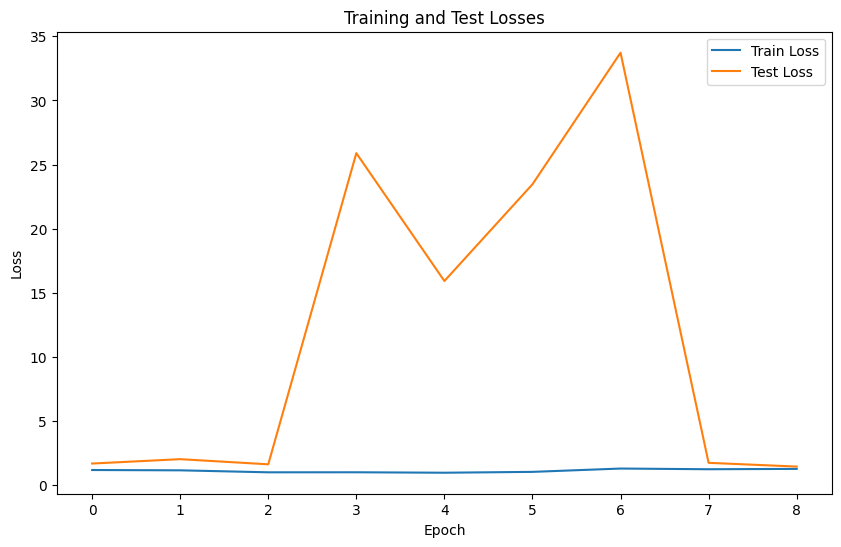

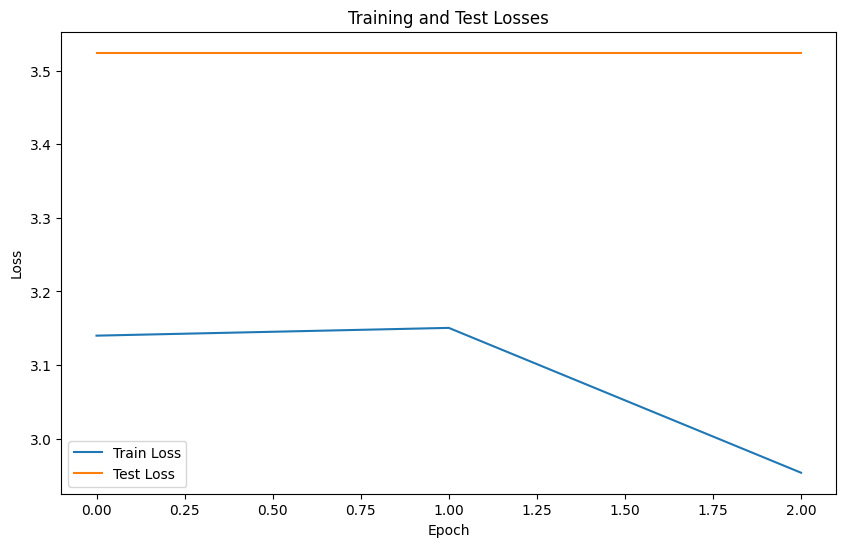

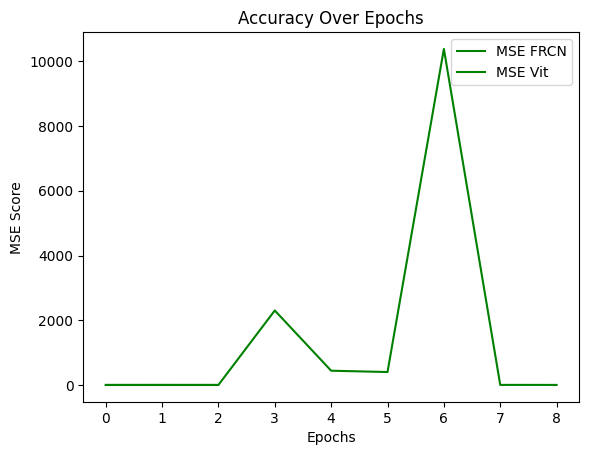

In [3]:

# Plotting the interpolated test losses with the train losses
plt.figure(figsize=(10, 6))
plt.plot(train_losses, label='Train Loss')
plt.plot(test_losses, label='Test Loss')
plt.title('Training and Test Losses')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(ctrain_losses, label='Train Loss')
plt.plot(ctest_losses, label='Test Loss')
plt.title('Training and Test Losses')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plotting the test acc
window_size = 1 
test_correctness_smoothed = uniform_filter1d(test_acc, size=window_size, mode='nearest')
plt.plot(test_correctness_smoothed, label='MSE FRCN', color='green')
test_correctness_smoothed = uniform_filter1d(ctest_acc, size=window_size, mode='nearest')
plt.plot(test_correctness_smoothed, label='MSE Vit', color='green')
plt.title('Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('MSE Score')
plt.legend()
plt.show()

In [24]:
print(train_losses)
print(test_losses)
print(test_correctness_smoothed)

[2.58625444 2.03677217 1.7398117  1.57013079 1.26497461 1.21375803]
[2.68919849 2.68919849 2.68919849 3.4543523  3.4543523  3.4543523 ]
[0.2        0.2        0.2        0.13333333 0.13333333 0.13333333]
